In [3]:
# This set of code will look to answer the question of "What race group is most likely to commit a crime
# and be a victim to a crime for each level of offense in each borough?", but for the victim side
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Importing Data
data = "cleaned_nyc_crime_data.csv"

data_df = pd.read_csv(data)
data_df

,offence level,borough,suspect age group,suspect race,suspect sex,Latitude,Longitude,Lat_Lon,victim age group,victim race,victim sex,pop
0,VIOLATION,BROOKLYN,45-64,WHITE,M,40.621708,-74.000593,"(40.621708, -74.000593)",25-44,WHITE,F,2590516
1,MISDEMEANOR,BROOKLYN,NaN,NaN,NaN,40.618867,-74.021057,"(40.618867, -74.021057)",25-44,WHITE,M,2590516
2,VIOLATION,BROOKLYN,25-44,BLACK,M,40.705035,-73.939373,"(40.705035, -73.939373)",45-64,BLACK,F,2590516
3,MISDEMEANOR,BROOKLYN,25-44,BLACK,NaN,40.700294,-73.990838,"(40.700294, -73.990838)",25-44,BLACK,F,2590516
4,MISDEMEANOR,BROOKLYN,45-64,WHITE,M,40.622093,-73.998140,"(40.622093, -73.99814)",NaN,NaN,NaN,2590516
...,...,...,...,...,...,...,...,...,...,...,...,...
519673,FELONY,MANHATTAN,NaN,WHITE HISPANIC,M,40.749404,-73.991784,"(40.749404, -73.991784)",45-64,NaN,M,1596273
519674,MISDEMEANOR,MANHATTAN,NaN,NaN,NaN,40.713135,-74.004058,"(40.71313543, -74.00405805)",NaN,NaN,NaN,1596273
519675,MISDEMEANOR,MANHATTAN,25-44,WHITE HISPANIC,M,40.710220,-74.007744,"(40.71022031, -74.00774423)",25-44,WHITE HISPANIC,M,1596273
519676,FELONY,MANHATTAN,NaN,NaN,M,40.738137,-74.004883,"(40.738137, -74.004883)",NaN,NaN,NaN,1596273


In [4]:
# Dropping na values in victim race column
victim_data_df = data_df.dropna(subset = ["victim race"])
victim_data_df = victim_data_df[["offence level","borough","victim race"]]
victim_data_df = victim_data_df.rename(columns={"offence level":"level"})
victim_data_df

,level,borough,victim race
0,VIOLATION,BROOKLYN,WHITE
1,MISDEMEANOR,BROOKLYN,WHITE
2,VIOLATION,BROOKLYN,BLACK
3,MISDEMEANOR,BROOKLYN,BLACK
5,VIOLATION,BROOKLYN,WHITE
...,...,...,...
519669,VIOLATION,MANHATTAN,WHITE HISPANIC
519670,FELONY,MANHATTAN,WHITE
519671,MISDEMEANOR,MANHATTAN,BLACK
519675,MISDEMEANOR,MANHATTAN,WHITE HISPANIC


In [5]:
# Making pandas series for each victim race
blackv = victim_data_df[victim_data_df["victim race"] == "BLACK"]
whisv = victim_data_df[victim_data_df["victim race"] == "WHITE HISPANIC"]
whitev = victim_data_df[victim_data_df["victim race"] == "WHITE"]
bhisv = victim_data_df[victim_data_df["victim race"] == "BLACK HISPANIC"]
aspacv = victim_data_df[victim_data_df["victim race"] == "ASIAN / PACIFIC ISLANDER"]
inalav = victim_data_df[victim_data_df["victim race"] == "AMERICAN INDIAN/ALASKAN NATIVE"]

# Segregating each victim race by the borough the crimes occurred in
black_bov = blackv.groupby(["borough"])
whis_bov = whisv.groupby(["borough"])
white_bov = whitev.groupby(["borough"])
bhis_bov = bhisv.groupby(["borough"])
aspac_bov = aspacv.groupby(["borough"])
inala_bov = inalav.groupby(["borough"])

In [6]:
# Counting all the crime levels within each borough
vblack_levelcounts = black_bov["level"].value_counts()
vwhis_levelcounts = whis_bov["level"].value_counts()
vwhite_levelcounts = white_bov["level"].value_counts()
vbhis_levelcounts = bhis_bov["level"].value_counts()
vaspac_levelcounts = aspac_bov["level"].value_counts()
vinala_levelcounts = inala_bov["level"].value_counts()

# Forming a dictionary to store everything
victim_dict = {"Black" : vblack_levelcounts,
                "White Hispanic" : vwhis_levelcounts,
                "White" : vwhite_levelcounts,
                "Black Hispanic" : vbhis_levelcounts,
                "Asian/Pacific Islander" : vaspac_levelcounts,
                "American Indian/Alaskan Native" : vinala_levelcounts}
#Forming the dataframe
final_vic_df = pd.DataFrame(victim_dict)
final_vic_df

Black  White Hispanic  White  Black Hispanic  \
borough       level                                                       
BRONX         FELONY        9707            9709   2032            3883   
              MISDEMEANOR  14451           12688   2448            4754   
              VIOLATION     7458            6069   1224            2020   
BROOKLYN      FELONY       14449            6147   8553            1135   
              MISDEMEANOR  22349            8362  11271            1482   
              VIOLATION    12557            3868   4558             667   
MANHATTAN     FELONY        6443            5739  10103            1736   
              MISDEMEANOR  10059            7722   9082            2289   
              VIOLATION     5456            3719   3737            1092   
QUEENS        FELONY        6241            7862   5254             729   
              MISDEMEANOR   9902           11126   7153             941   
              VIOLATION     5097            4507   3180             389   
STATEN ISLAND FELONY         941             798   2008             125   
              MISDEMEANOR   1827            1432   3258             264   
              VIOLATION     1196             836   1949             121   

                           Asian/Pacific Islander  \
borough       level                                 
BRONX         FELONY                         1106   
              MISDEMEANOR                    1184   
              VIOLATION                       587   
BROOKLYN      FELONY                         3987   
              MISDEMEANOR                    4263   
              VIOLATION                      1600   
MANHATTAN     FELONY                         3420   
              MISDEMEANOR                    3625   
              VIOLATION                      1398   
QUEENS        FELONY                         7669   
              MISDEMEANOR                    8684   
              VIOLATION                      3365   
STATEN ISLAND FELONY                          368   
              MISDEMEANOR                     531   
              VIOLATION                       227   

                           American Indian/Alaskan Native  
borough       level                                        
BRONX         FELONY                                  158  
              MISDEMEANOR                             198  
              VIOLATION                                80  
BROOKLYN      FELONY                                  153  
              MISDEMEANOR                             257  
              VIOLATION                               129  
MANHATTAN     FELONY                                  168  
              MISDEMEANOR                             220  
              VIOLATION                                82  
QUEENS        FELONY                                  134  
              MISDEMEANOR                             233  
              VIOLATION                               109  
STATEN ISLAND FELONY                                   47  
              MISDEMEANOR                              76  
              VIOLATION                                58

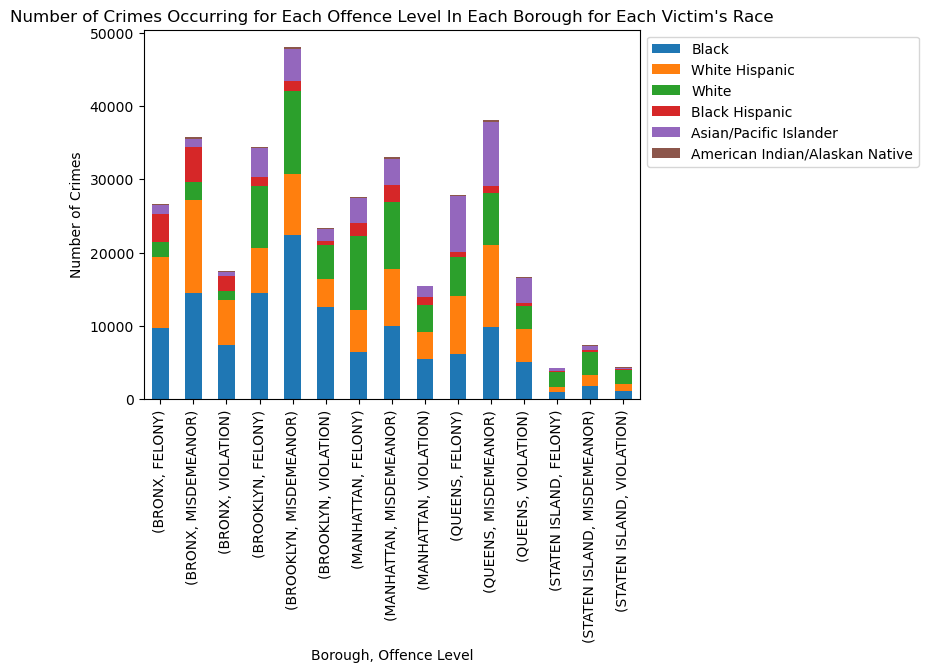

In [10]:
vic_plot = final_vic_df.plot(kind="bar",stacked=True,title="Number of Crimes Occurring for Each Offence Level In Each Borough for Each Victim's Race",xlabel="Borough, Offence Level",ylabel="Number of Crimes")
vic_plot.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("Victim Race Graph.png",bbox_inches="tight")